<a href="https://colab.research.google.com/github/ashlvy/Book-Recommender-System/blob/main/Book_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity


In [7]:
books = pd.read_csv('/Books.csv')

# Load the Users dataset
users = pd.read_csv('/Users.csv')

# Load the Ratings dataset
ratings = pd.read_csv('/Ratings.csv')
# Display the first few rows of each dataset to verify they are loaded
print("Books Data:\n", books.head())
print("\nUsers Data:\n", users.head())
print("\nRatings Data:\n", ratings.head())

Books Data:
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford               2002.0     Oxford University Press   
1  Richard Bruce Wright               2001.0       HarperFlamingo Canada   
2          Carlo D'Este               1991.0             HarperPerennial   
3      Gina Bari Kolata               1999.0        Farrar Straus Giroux   
4       E. J. W. Barber               1999.0  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http:/

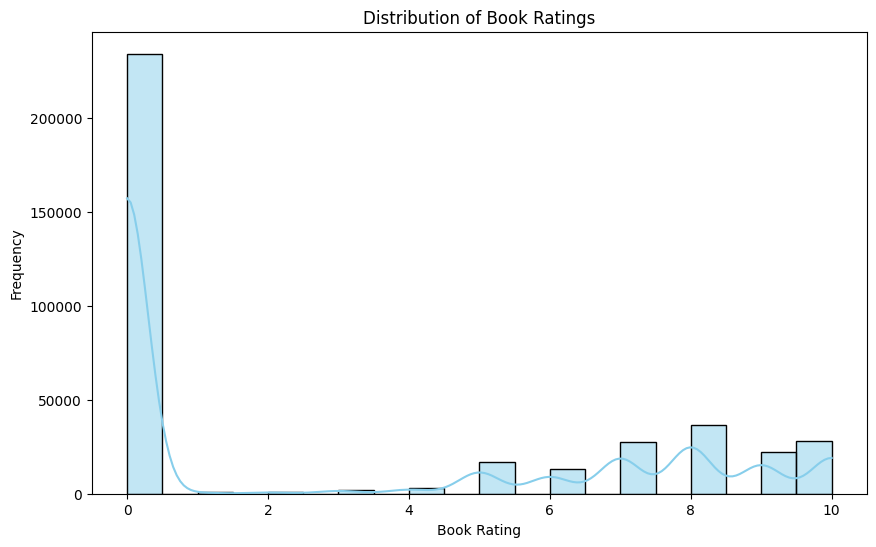

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings['Book-Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Book Ratings")
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.show()


<ipython-input-9-1ec13b14e98a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.index, y=top_books.values, palette="viridis")


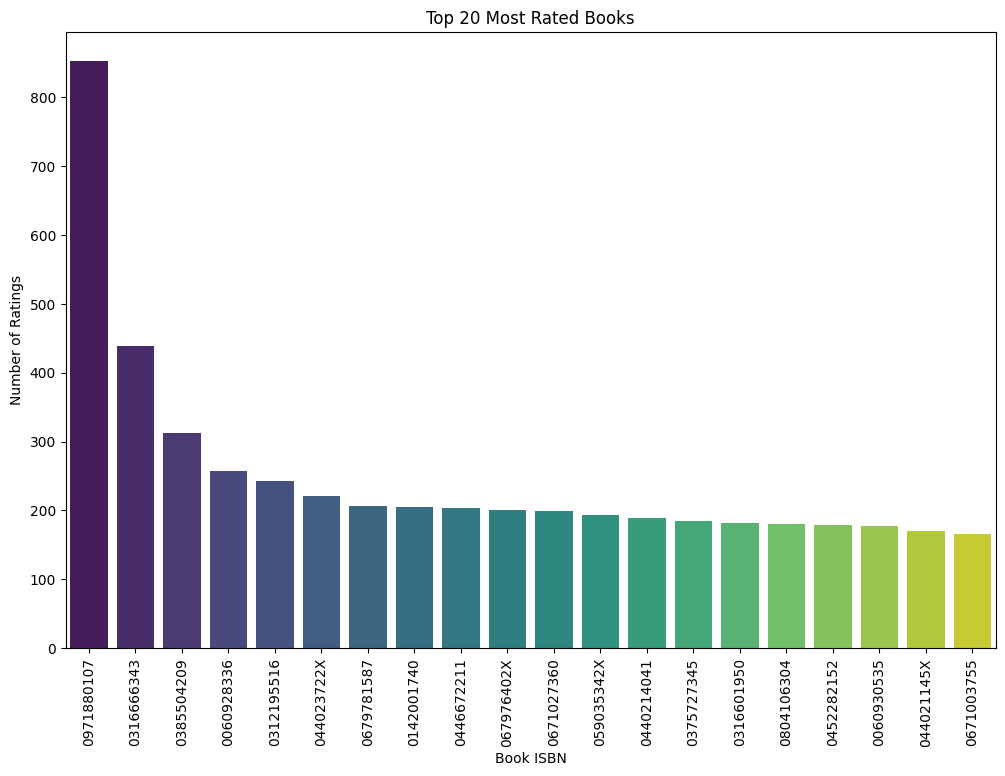

In [9]:
# count the number of ratings per book
rating_counts = ratings['ISBN'].value_counts()

# plot the top 20 books with the most ratings
top_books = rating_counts.head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=top_books.index, y=top_books.values, palette="viridis")
plt.title("Top 20 Most Rated Books")
plt.xlabel("Book ISBN")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()

<ipython-input-10-989bccb59c8c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette="coolwarm")


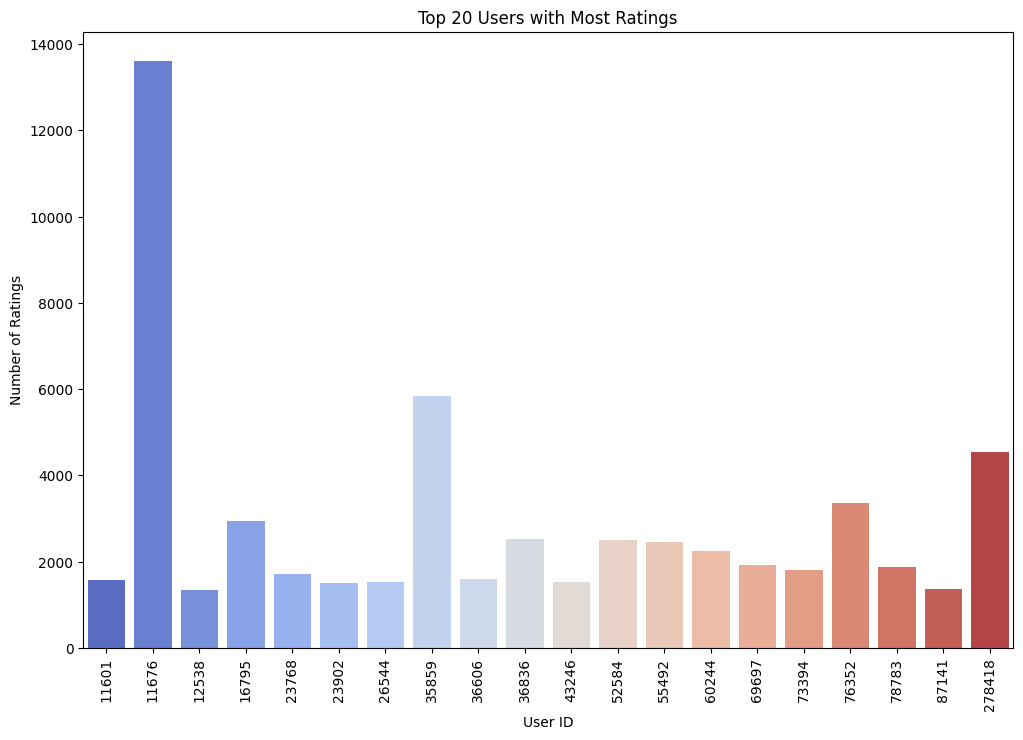

In [10]:
# Count the number of ratings per user
user_counts = ratings['User-ID'].value_counts()

# Plot the top 20 users with the most ratings
top_users = user_counts.head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=top_users.index, y=top_users.values, palette="coolwarm")
plt.title("Top 20 Users with Most Ratings")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()


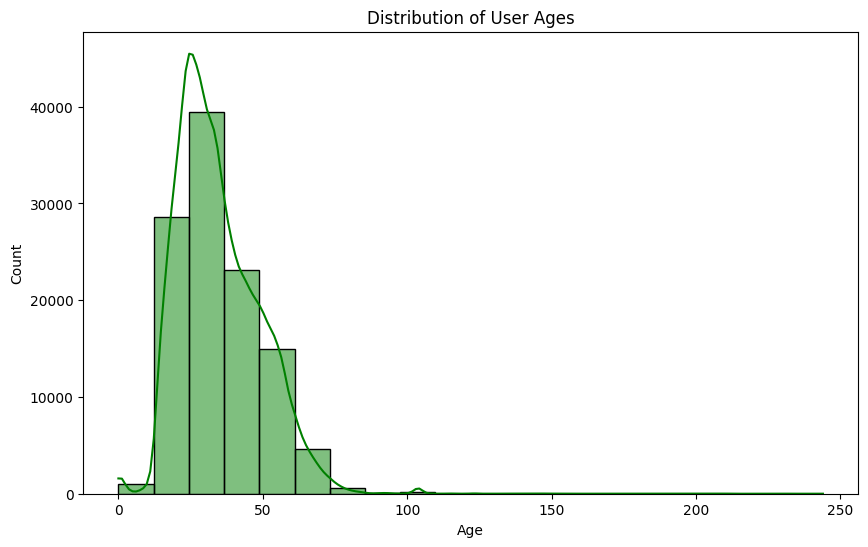

In [11]:
#Histogram of user ages
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'], kde=True, color='green', bins=20)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

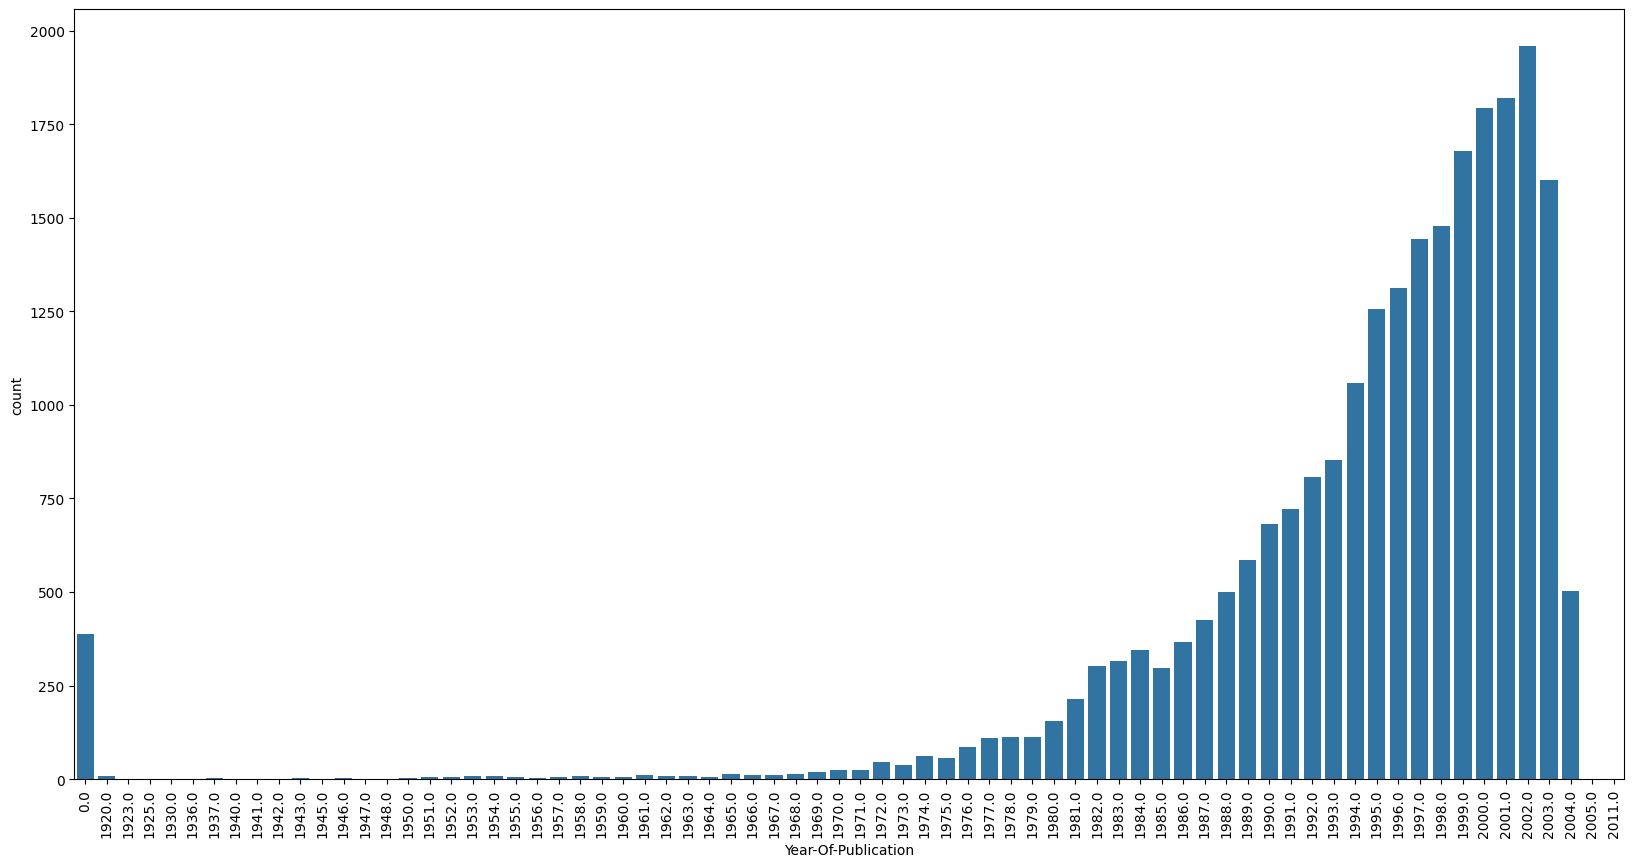

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication'])
plt.xticks(rotation=90)
plt.show()

<ipython-input-13-9edd7340baf6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


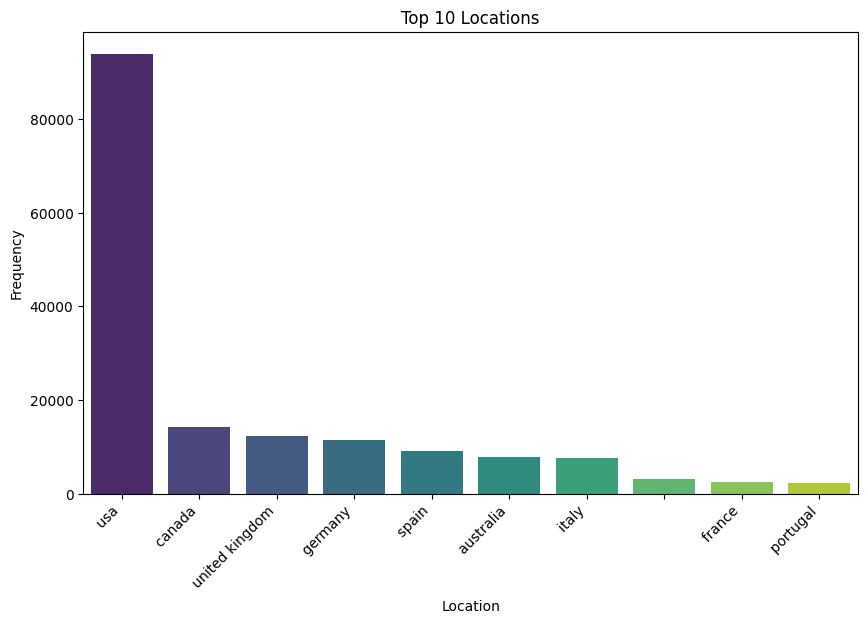

In [13]:
# Ensure 'Location' is treated as a string and extract the last part (city/country)
users['Location'] = users['Location'].fillna('Unknown').astype(str)

# Extract the last part of the 'Location' by splitting on commas (without strip)
users['Location'] = users['Location'].str.split(',').str[-1]

# Get the top 10 most frequent locations
top_locations = users['Location'].value_counts().head(10)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')

# Add labels and title for better readability
plt.title('Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# preprocessing step
# drop duplicates based on isbn
books.drop_duplicates(subset='ISBN', inplace=True)

# drop duplicate books based on the title, keeping the first occurrence
books = books.drop_duplicates(subset='Book-Title', keep='first').reset_index(drop=True)

# merge ratings with books dataset to get book details
book_ratings = ratings.merge(books, on='ISBN')

# filter books with at least 50 ratings for better recommendations
popular_books = book_ratings['Book-Title'].value_counts() > 50
popular_books = popular_books[popular_books].index
book_ratings = book_ratings[book_ratings['Book-Title'].isin(popular_books)]

# reset the index of the book_ratings df after filtering the dataset to include only popular books
book_ratings.reset_index(drop=True, inplace=True)

# combines metadata features into one content field

# i used content based filtering instead of collaborative bc i had a lot of metadata for each book, such as the title, author, publisher, and year of publication.
books['content'] = books['Book-Title'].fillna('') + ' ' + \
                   books['Book-Author'].fillna('') + ' ' + \
                   books['Publisher'].fillna('') + ' ' + \
                   books['Year-Of-Publication'].astype(str)

# content based filtering step
# create a tf-idf matrix for combined metadata
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(books['content'])

# compute cosine similarity between books based on combined content
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# recommender function
def recommend_books(book_title, n=5):
    """recommend books based on combined content features."""
    if book_title not in books['Book-Title'].values:
        print(f"Book '{book_title}' not found in the dataset.")
        return

    # get the index of the selected book
    idx = books[books['Book-Title'] == book_title].index[0]

    # calc similarity scores & print
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

    # ensure recommendations have unique titles
    unique_books = []
    recommendations = []

    for i, score in sim_scores:
        title = books.iloc[i]['Book-Title']
        if title not in unique_books:
            unique_books.append(title)
            recommendations.append((title, books.iloc[i]['Book-Author'], score))
        if len(recommendations) >= n:
            break

    print(f"Books you may like: '{book_title}'")
    for title, author, score in recommendations:
        print(f"{title} by {author} (Similarity: {score:.2f})")

# testing
book_title_input = input("Enter a book title: ")
recommend_books(book_title_input)


Enter a book title: To the Lighthouse
Books you may like: 'To the Lighthouse'
To the Lighthouse (Penguin Popular Classics) by Virginia Woolf (Similarity: 0.63)
The Waves by Virginia Woolf (Similarity: 0.54)
Mrs Dalloway by Virginia Woolf (Similarity: 0.53)
A Haunted House and Other Short Stories by Virginia Woolf (Similarity: 0.49)
Virginia Woolf: A Biography by Quentin Bell (Similarity: 0.47)


In [15]:
from sklearn.metrics import f1_score

def calculate_precision_recall_f1(book_title, recommendations, all_books, similarity_threshold=0.8):
    """
    Calculate precision, recall, and F1 score for one book's recommendations.

    book_title: The title of the input book.
    recommendations: List of tuples with recommended books and similarity scores.
    all_books: Full dataset of books.
    similarity_threshold: Threshold above which books are considered relevant.
    """
 # I consider books by the same author as the input book to be 'relevant'
    input_author = all_books[all_books['Book-Title'] == book_title]['Book-Author'].values[0]
    relevant_books = all_books[all_books['Book-Author'] == input_author]
    total_relevant = len(relevant_books)  # total relevant books

#Finds relevant books among recommendations (those with a similarity score >= similarity_threshold)
    relevant_in_recommendations = [
        book for book, score in recommendations if score >= similarity_threshold
    ]
    true_positives = len(relevant_in_recommendations)

#Calculates  precision and recall and f1
    precision = true_positives / len(recommendations) if recommendations else 0
    recall = true_positives / total_relevant if total_relevant > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


#Example reccomendations data
example_recommendations = [
    ("To the Lighthouse (Penguin Popular Classics)", 0.63),
    ("The Waves", 0.54),
    ("Mrs Dalloway", 0.53),
    ("A Haunted House and Other Short Stories", 0.50),
    ("Virginia Woolf: A Biography", 0.37),
]

#Displays precision,f1,recall
precision, recall, f1 = calculate_precision_recall_f1(
    "To the Lighthouse",
    example_recommendations,
    books,
    similarity_threshold=0.4
)

# displays the final precision, recall, and f1 Score
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.80
Recall: 0.25
F1 Score: 0.38
